Implementation of vibrating string model, described
in JSV paper (Issanchou 2017) and using Siconos for contact
simulation.

In [1]:
from string_ds import StringDS
from fret import Guitar, Fret
import matplotlib.pyplot as plt
import time

In [2]:
# ---- Description of the string ---
# -- Geometry and material --
G_string = {
    'length': 1.002,
    'diameter': 0.43e-3,
    'density': 1.17e-3,
    'B': 1.78e-5,
    'tension': 180.5,
}

# A dictionnary with parameters required to compute quality factor
damping_parameters = {
    'nu_air': 1.8e-5,
    'rho_air': 1.2,
    'delta_ve': 4.5e-3,
    '1/qte': 2.03e-4}

In [3]:
# -- Spatial discretisation (modal proj) and initial conditions --
number_of_modes = 101
ndof = number_of_modes + 2
imax = int(ndof / 2)
# -- The dynamical system(s) --

In [4]:
guitar_string_m = StringDS(ndof, geometry_and_material=G_string,
                           damping_parameters=damping_parameters,
                           umax=1.8e-3, imax=imax, use_sparse=False,
                           modal_form=True)

In [5]:
fret_m = Fret(guitar_string_m, position=[imax, -0.00])

In [8]:
# -- The model to gather frets and strings and simulate the dynamics --
t0 = 0.
tend = 0.31
guitar_model_m = Guitar(guitar_string_m, fret_m, [t0, tend], fs=2.01e5)

In [9]:
# -- Run the simulation --


def run_simu(model):
    k = 1
    print("Start simulation ...")
    while model.simu.hasNextEvent():
        model.simu.computeOneStep()
        model.save_state(k)
        k += 1
        model.simu.nextStep()
    print 'End of simulation process.'

In [10]:
run_simu(guitar_model_m)

Start simulation ...
End of simulation process.


In [11]:
%matplotlib inline

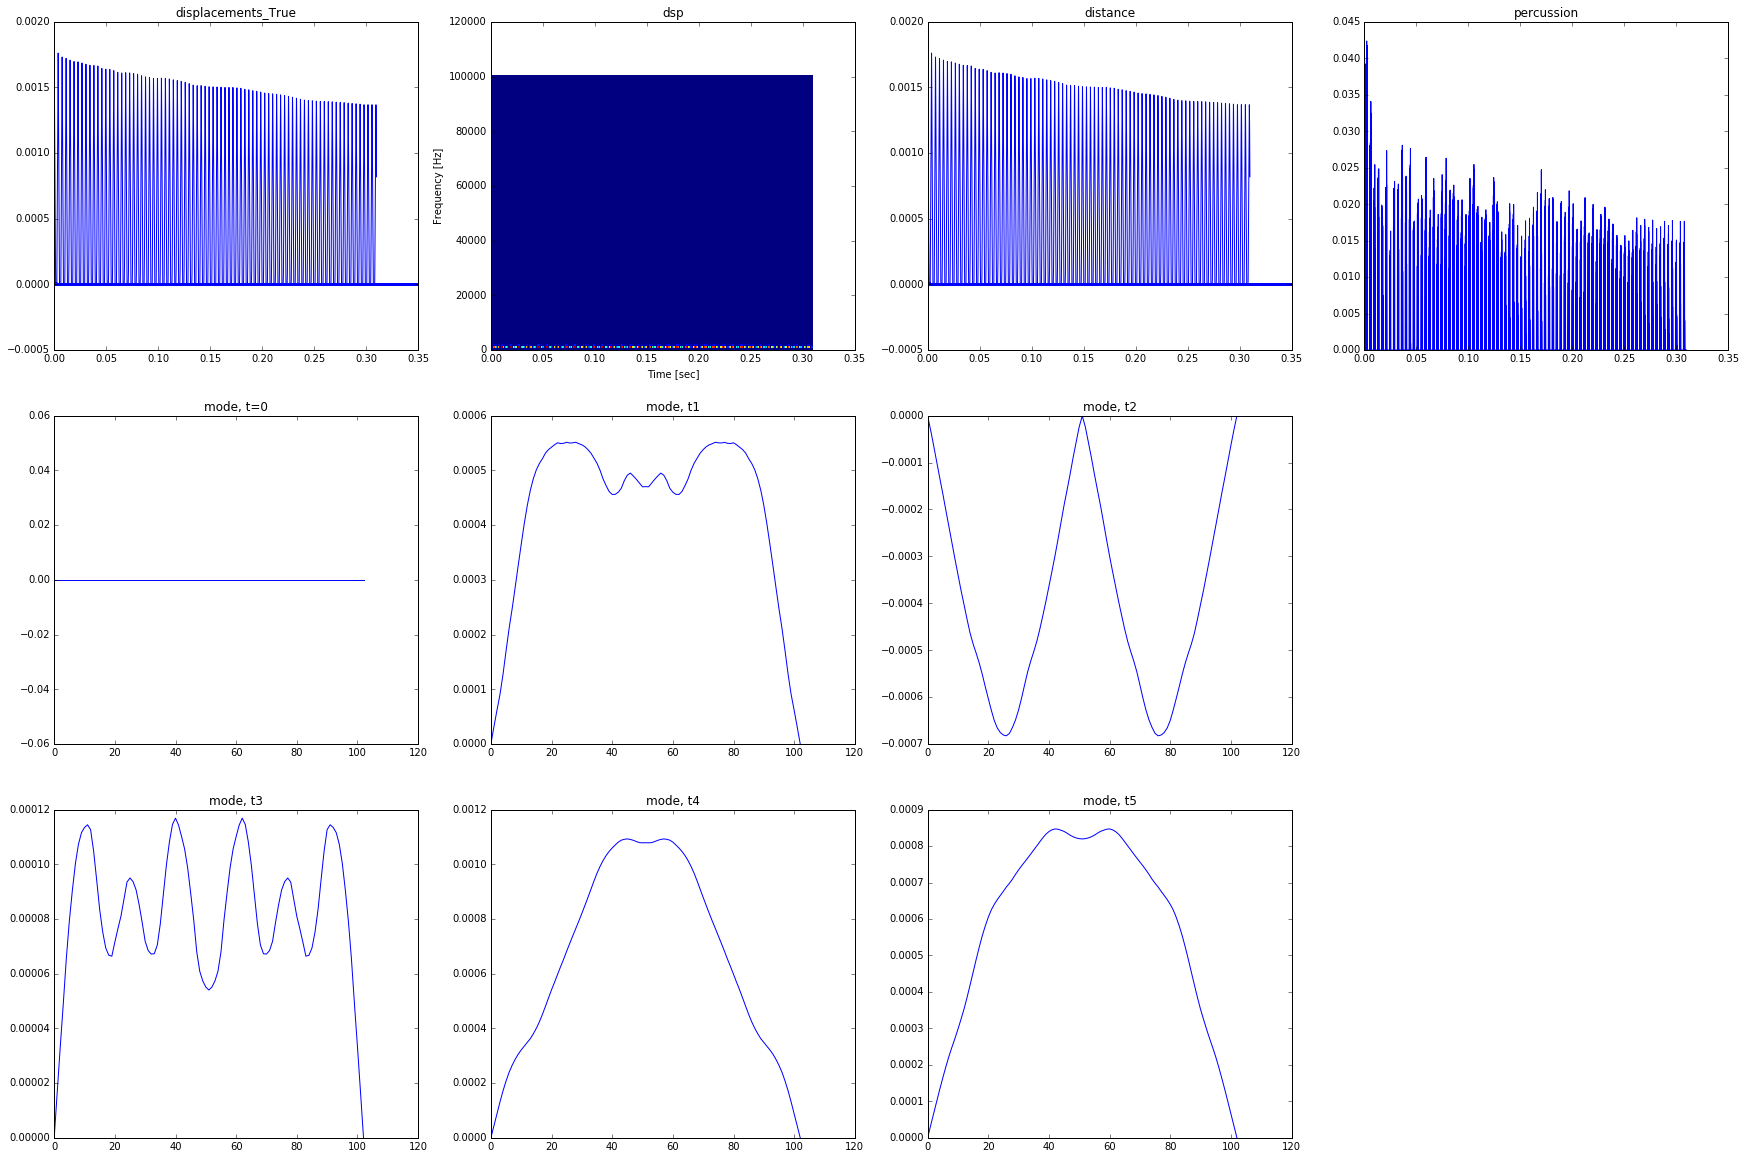

In [17]:
plt.figure(figsize=(30, 20))
fig2 = guitar_model_m.plot_state(1)
